**RStudio** comes with a tool that can help you build functions. To use it, highlight the lines of code in your R script that you want to turn into a function. Then click `Code > Extract` Function in the menu bar. RStudio will ask you for a function name to use and then wrap you code in a function call. It will scan the code for undefined variables and use these as arguments. You may want to double-check RStudio's work. It assumes that your code is correct, so if it does something surprising, you may have a problem in your code.

In [1]:
library(knitr)
library(rgl)

# Random Number Generation from MVN

Let $\mathbf{X}\sim \mathbf{N}_p (\mathbf{\mu},\mathbf{\Sigma})$ and in particular we draw a sample from BVN with $\mu_1=\mu_2=0,\hspace{1em}\sigma_1^2=\sigma_2^2=1\hspace{1em}and\hspace{1em}\rho=0.5$.  
OR
$$
\mathbf{X}\sim\mathbf{N}_2(\mathbf{\mu,\Sigma})\\
where \hspace{1em}\mathbf{\mu} = \begin{pmatrix}   0 \\        0      \end{pmatrix}  \hspace{1em}
and \hspace{1em} \mathbf{\Sigma}= \begin{pmatrix} 1 & 0.5   \\   0.5 & 1     \end{pmatrix}
$$

 [1]  1.23429063 -1.14128257 -0.89785304 -1.03589969 -0.46176304 -0.38415377
 [7]  0.02063839 -0.08314379  1.45199421  0.16328934


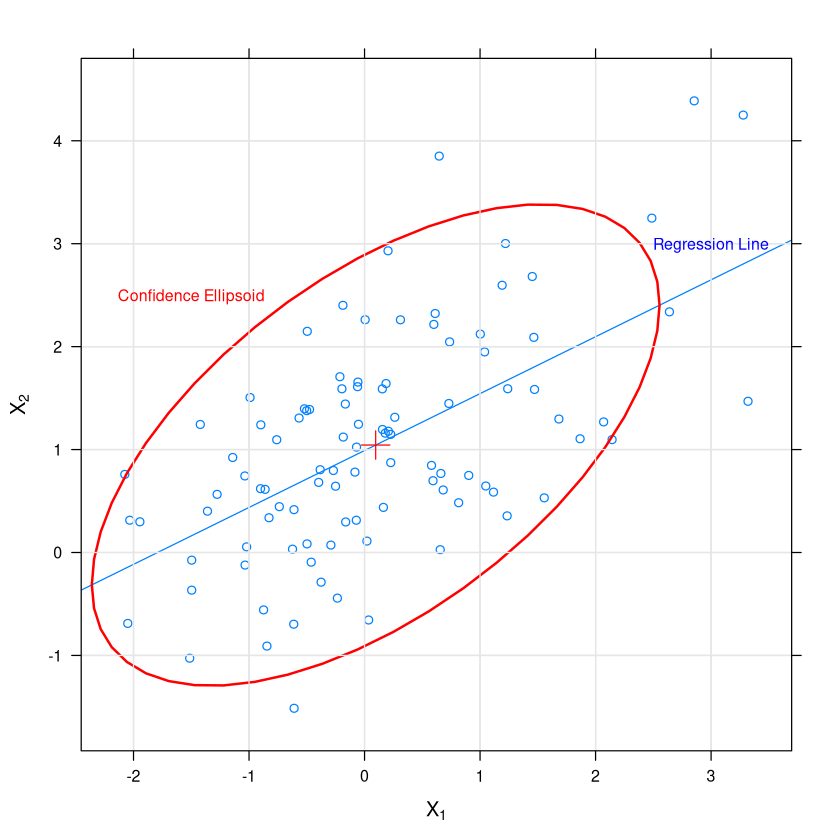

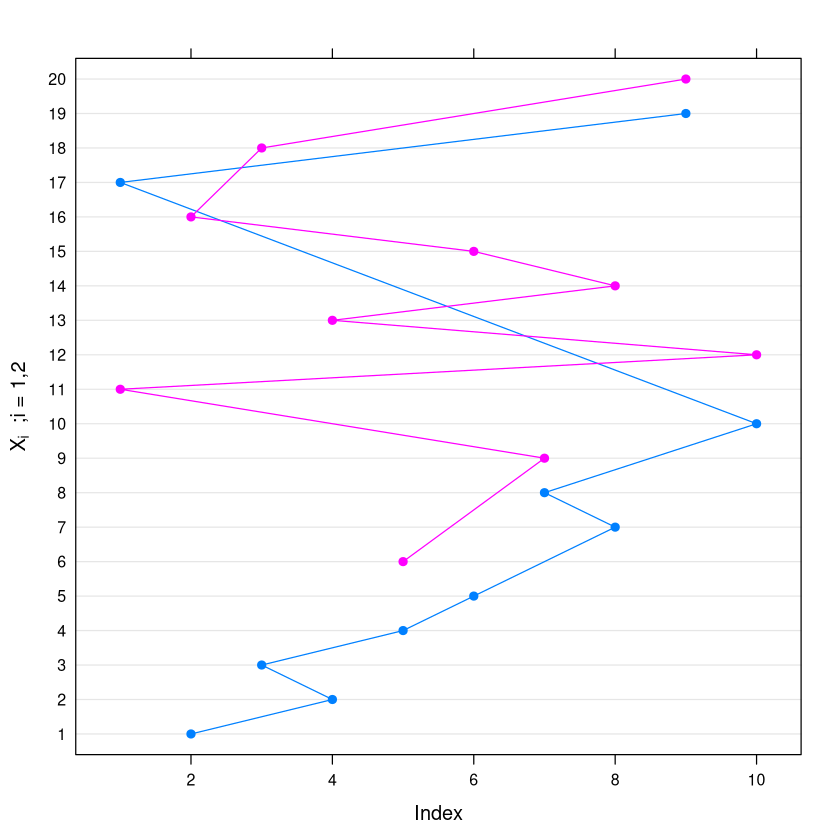

In [2]:
library(MASS, quietly = T)
library(lattice, quietly = T)
library(latticeExtra, quietly = T)
set.seed(45)          # specify generator seeds
x <- mvrnorm(n=100,mu=c(0,1),Sigma=matrix(c(1,0.5,0.5,1),2,2))
colnames(x) <- paste("X",1:2,sep = "")
print(x[1:10])
xyplot(x[,2]~x[,1], type = c("p","r"), grid = TRUE, xlab = expression(X[1]), 
       ylab = expression(X[2]), panel = function(x,y,...){
                                  panel.xyplot(x,y,...)
                                  panel.ellipse(x,y,lwd = 2, level = 0.9, col = "red",...)
                                  panel.text(3,3,"Regression Line", cex = 0.8, col = "blue")
                                  panel.text(-1.5,2.5,"Confidence Ellipsoid", cex = 0.8, col = "red")
                                  })
dotplot(x[1:10,1]+x[1:10,2]~seq_len(10),type = "o", pch = 19, xlab = "Index", 
        ylab = expression(paste(X[i],"  ;i = 1,2")))

Now we shall plot a random sample and an ellipsoid of concentration corresponding to a 95%  probability region for a trivariate normal distribution.

$$
\mathbf{X}\sim\mathbf{N}_3(\mathbf{\mu,\Sigma})\\
where \hspace{1em}\mathbf{\mu} = \begin{pmatrix}   1 \\    \ 2   \\ 3     \end{pmatrix}  \hspace{1em}
and \hspace{1em} \mathbf{\Sigma}= \begin{pmatrix} 10 & 3 &  0 \\   3 & 2  & 0  \\  0 & 0 & 1 \end{pmatrix}
$$

In [ ]:
library(rgl)
Sigma <- matrix(c(10, 3, 0, 3, 2, 0, 0, 0, 1), 3, 3)
Mean <- 1:3
x <- mvrnorm(1000, Mean, Sigma)
open3d()
plot3d(x, box = FALSE)
plot3d(ellipse3d(Sigma, centre = Mean), col = "green", alpha = 0.5, add = TRUE)
rglwidget()

# 3D Plot

Now we consider to plot a 3 dimensional figure (called Mexican Hat)

In [ ]:
f <- function(x,y) {10 * sin(sqrt(x^2+y^2))/sqrt(x^2+y^2)}
x <- seq(-10, 10, length = 30)
y <- x
z <- outer(x, y, f)
open3d()
persp3d(x, y, z, theta = 30, phi = 30, expand = 0.5, col = "skyblue")                   
rglwidget()

# Comparing Decision Boundaries of Different Classifiers

## Simple Plot Function for Decision Boundaries

We have bivariate data and the third column denoting class.

In [3]:
decisionplot <- function(model, data, class = NULL, predict_type = "class",
  resolution = 200, showgrid = TRUE, ...) {

  if(!is.null(class)) cl <- data[,class] else cl <- 1
  data <- data[,1:2]
  k <- length(unique(cl))

  plot(data, col = as.integer(cl)+1L, pch = as.integer(cl)+1L, ...)

  # make grid
  r <- sapply(data, range, na.rm = TRUE)
  xs <- seq(r[1,1], r[2,1], length.out = resolution)
  ys <- seq(r[1,2], r[2,2], length.out = resolution)
  g <- cbind(rep(xs, each=resolution), rep(ys, time = resolution))
  colnames(g) <- colnames(r)
  g <- as.data.frame(g)

  ### guess how to get class labels from predict
  ### (unfortunately not very consistent between models)
  p <- predict(model, g, type = predict_type)
  if(is.list(p)) p <- p$class
  p <- as.factor(p)

  if(showgrid) points(g, col = as.integer(p)+1L, pch = ".")

  z <- matrix(as.integer(p), nrow = resolution, byrow = TRUE)
  contour(xs, ys, z, add = TRUE, drawlabels = FALSE,
    lwd = 2, levels = (1:(k-1))+.5)

  invisible(z)
}

## Iris Dataset

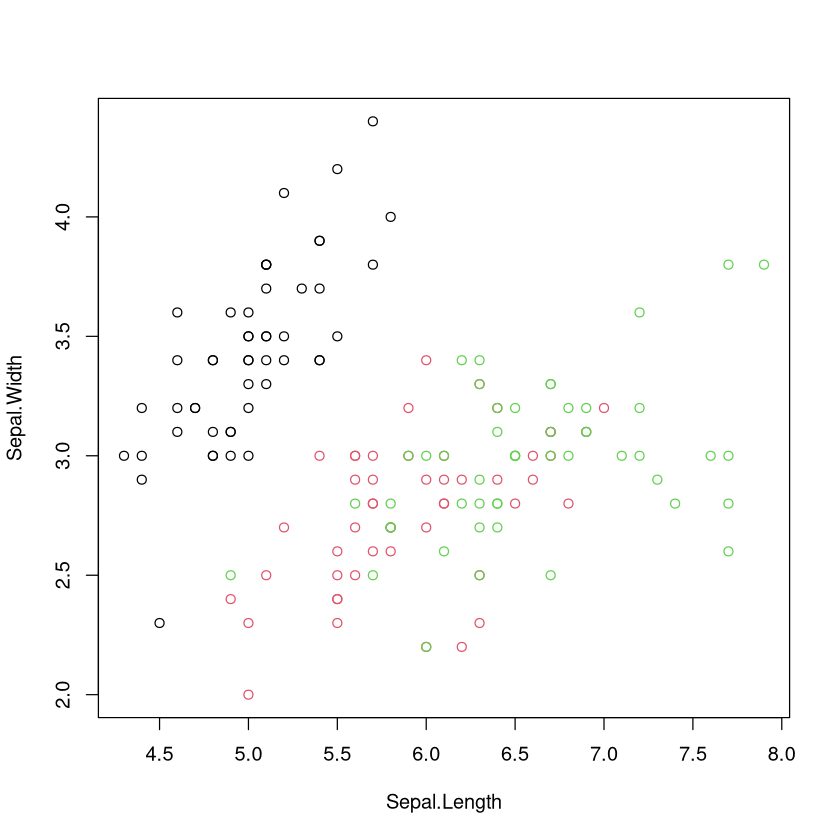

In [4]:
set.seed(1000)
data(iris)
x <- iris[1:150, c("Sepal.Length", "Sepal.Width", "Species")]
plot(x[,1:2], col = x[,3])

## kNN

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:latticeExtra’:

    layer




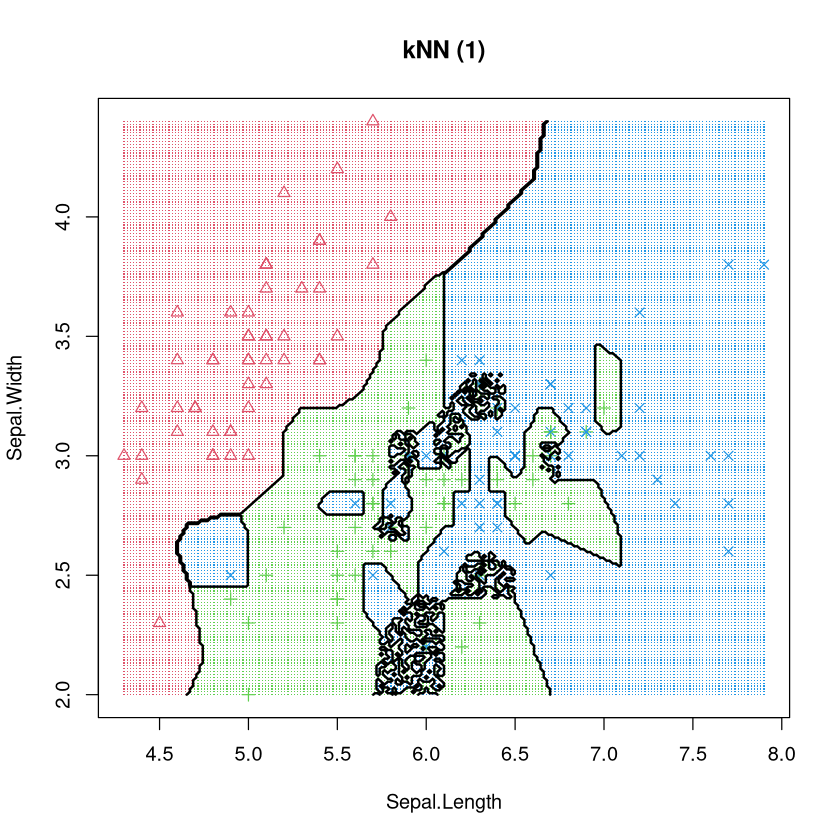

In [5]:
library(caret)
model <- knn3(Species ~ ., data=x, k = 1)
decisionplot(model, x, class = "Species", main = "kNN (1)")

## Naive Bayes

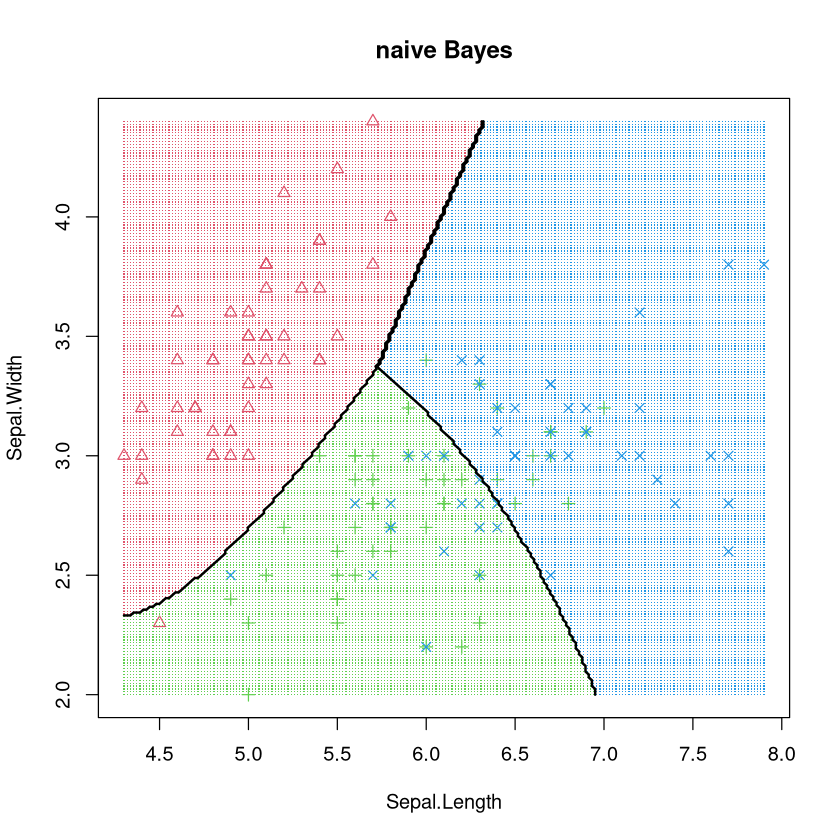

In [6]:
library(e1071)
model <- naiveBayes(Species ~ ., data=x)
decisionplot(model, x, class = "Species", main = "naive Bayes")

## LDA

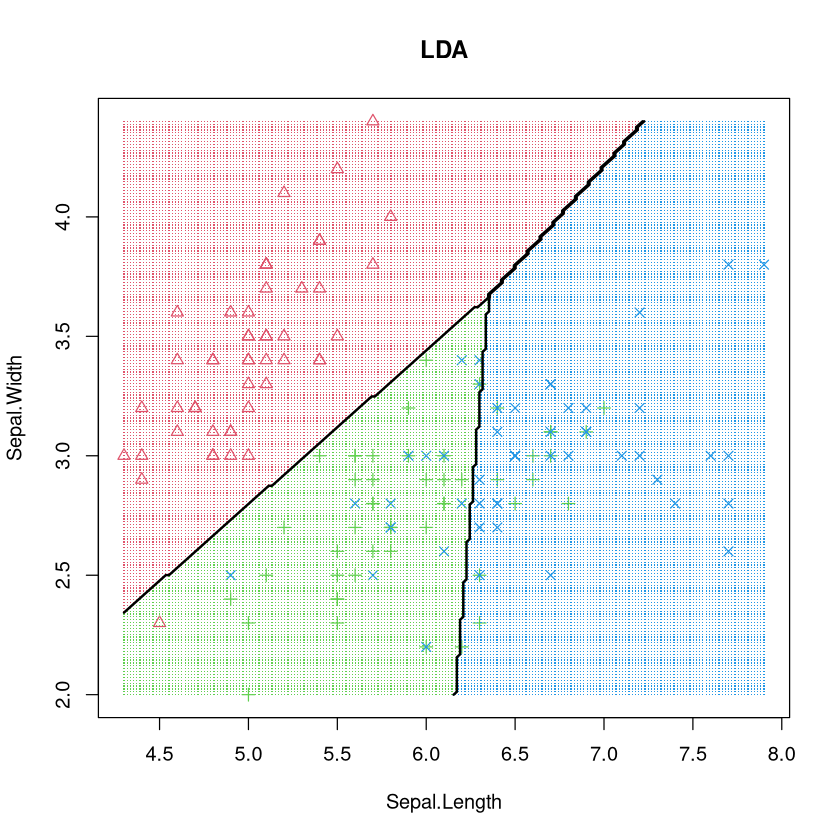

In [7]:
library(MASS)
model <- lda(Species ~ ., data=x)
decisionplot(model, x, class = "Species", main = "LDA")

## Logistic
Consider only two classes

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


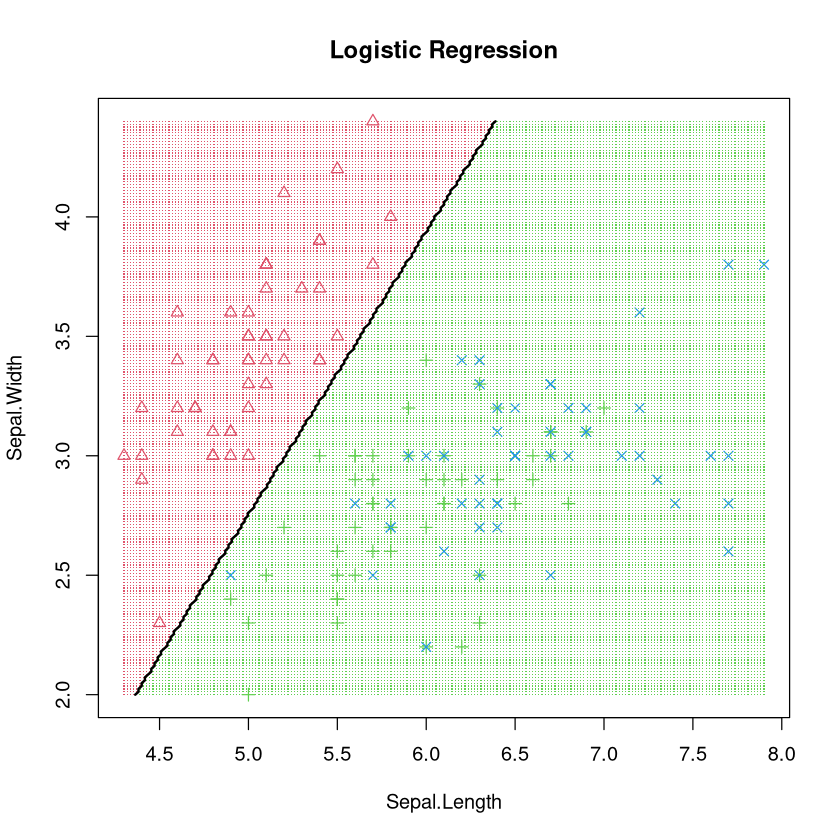

In [8]:
model <- glm(Species ~., data = x, family=binomial(link='logit'))
class(model) <- c("lr", class(model))
predict.lr <- function(object, newdata, ...)
  predict.glm(object, newdata, type = "response") > .5

decisionplot(model, x, class = "Species", main = "Logistic Regression")

## CART

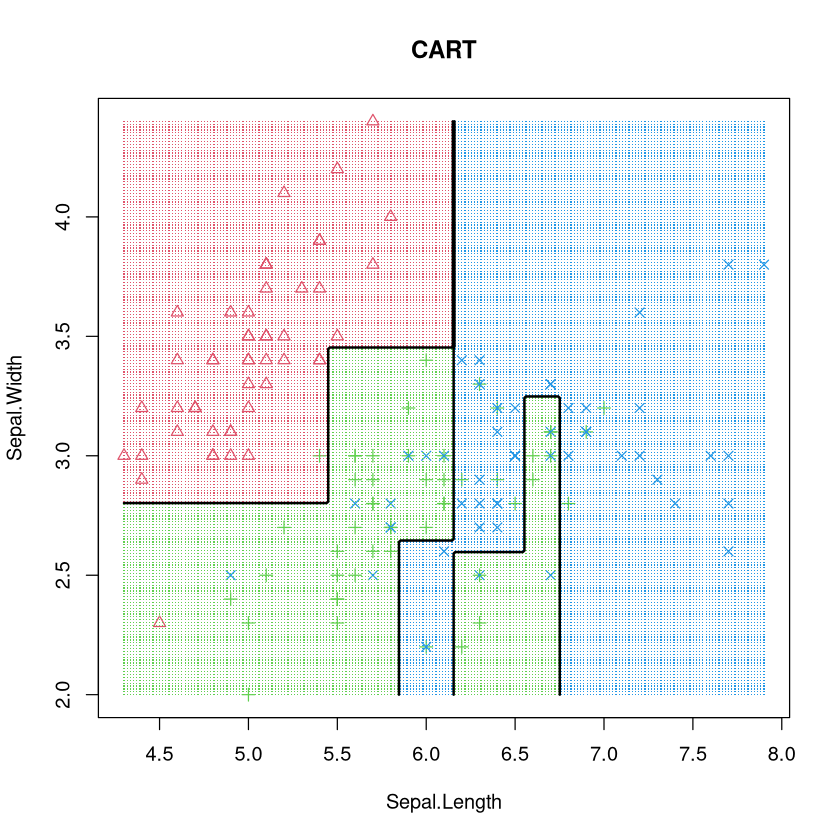

In [9]:
library("rpart")
model <- rpart(Species ~ ., data=x, 
               control = rpart.control(cp = 0.001, minsplit = 8))
decisionplot(model, x, class = "Species", main = "CART")

## Random Forest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




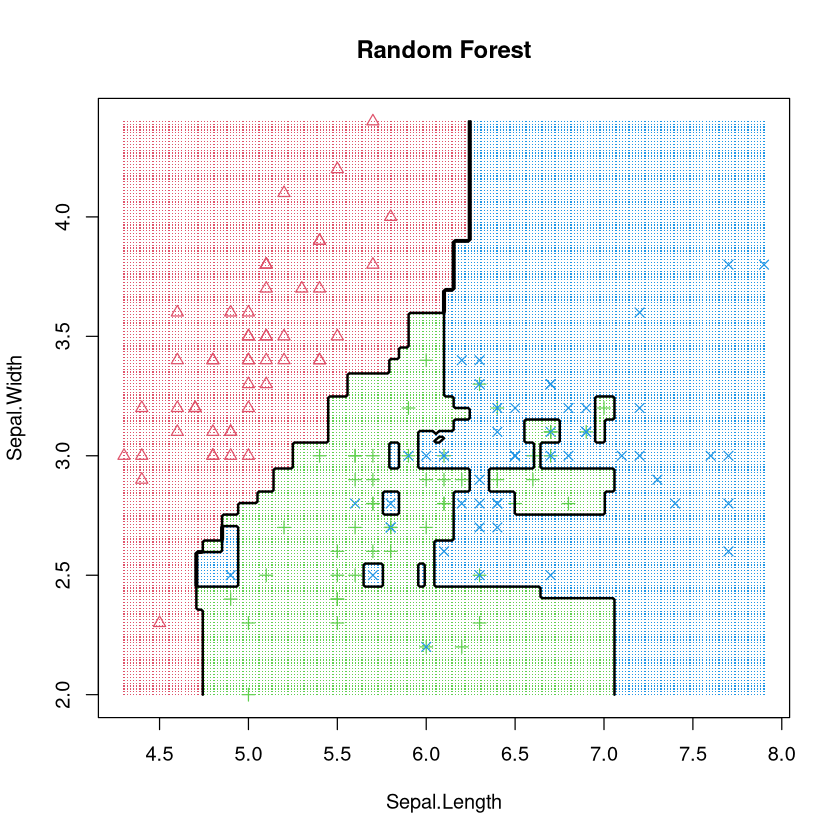

In [11]:
library(randomForest)
model <- randomForest(Species ~ ., data=x)
decisionplot(model, x, class = "Species", main = "Random Forest")

## SVM

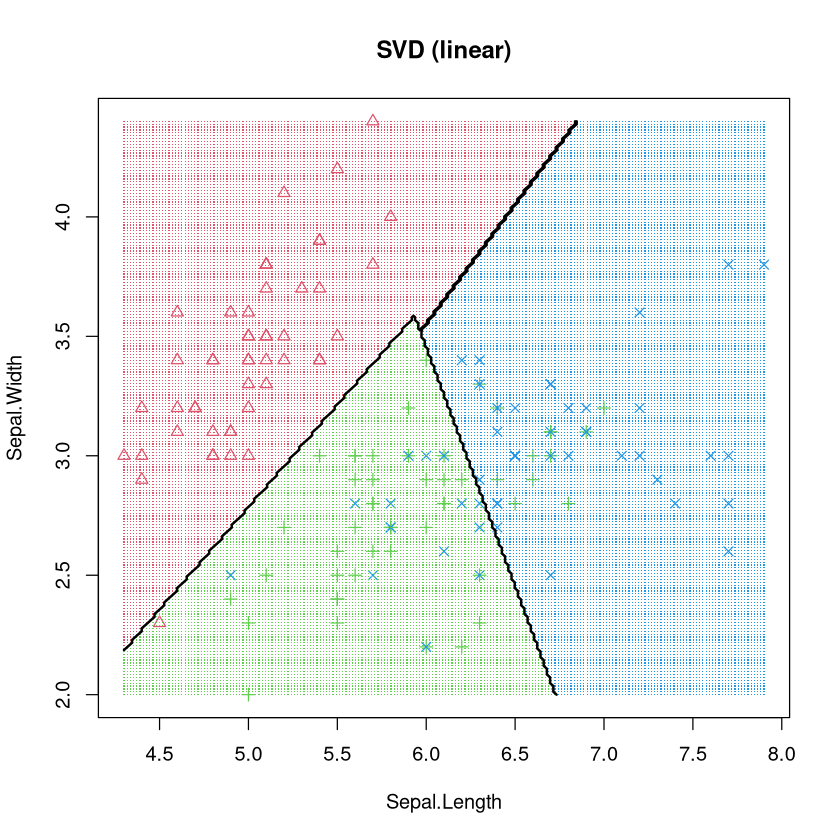

In [12]:
library(e1071)
model <- svm(Species ~ ., data=x, kernel="linear")
decisionplot(model, x, class = "Species", main = "SVD (linear)")

# Various Modes for Linear Models

| Model | Details  |
|--------------------|------------------------------------------------------------|
| $Y \sim .$| model with variable Y explained by all the other variables in the dataset  |
| $Y \sim x1+x2$| model with the variable $Y$ explained by the variables $x1$, $x2$;equivalent to $Y \sim 1+x1+x2$  |
| $Y \sim -1+x1+x2$| model with the variable $Y$ explained by the variables $x1$,$x2$ without the constant  |
| $Y \sim x1+x2+x1:x2$| model with the variable $Y$ explained by the variables $x1$, $x2$ and the interaction  |
| $Y \sim x1*x2$| equivalent to the the previous model  |
| $Y \sim x1*x2*x3$| is equivalent to the model with all the main effects and the interactions  |
| $Y \sim (x1+x2):x3$| is equivalent to the model $Y \sim x1:x3+x2:x3$  |
| $Y \sim x1*x2*x3-x1:x2:x3$| is equivalent to the model $Y \sim x1+x2+x3+x1:x2+x1:x3+x2:x3$  |
| $Y \sim x1+x2$%in%$x1$|model with the effects of $x1$ and of $x2$ organised into a hierarchy in $x1$ |
| $Y \sim sin(x1)+sin(x2)$| model of $Y$ by $sin(x1)$ and $sin(x2)$  |
| $Y \sim x1|fac$| model where the effect of $x1$ is possible for each level of fac  |
| $Y \sim I$($x1$^2)| model with the variable $Y$ explained by $x1$^2;$I(.)$ protects the expression $x1$^2, else $x1$^2 is interpreted as $x1*x1=x1+x1+x1:x1=x1$  |
| $Y \sim I(x1+x2)$| model where the variable $Y$ is explained by the constant and the variable resulting from the sum (individual by individual) of the variables $x1$ and $x2$; $I(.)$ protects the expression $x1+x2$, otherwise $x1+x2$ is interpreted as two explanatory variables  |

# Circle Plotting Function

Add a circle to an existing plot. R, bizarrely, does not have any built-in function for this

*Inputs*: x coordinate of center; y coordinate of center; radius; number of equiangular steps; additional graphical parameters

*Outputs*: none

Side-effects: a circle is added to the existing plot

First create the circle function.

In [13]:
circle <- function(x0=0, y0=0, r, n=1000, ...) {
  theta <- seq(from = 0, to = 2*pi, length.out = n) # Angles
  x <- x0 + r*cos(theta) # x coordinates
  y <- y0 + r*sin(theta) # y coordinates
  lines(x,y,...) # Draw the lines connecting all the points, in order
}

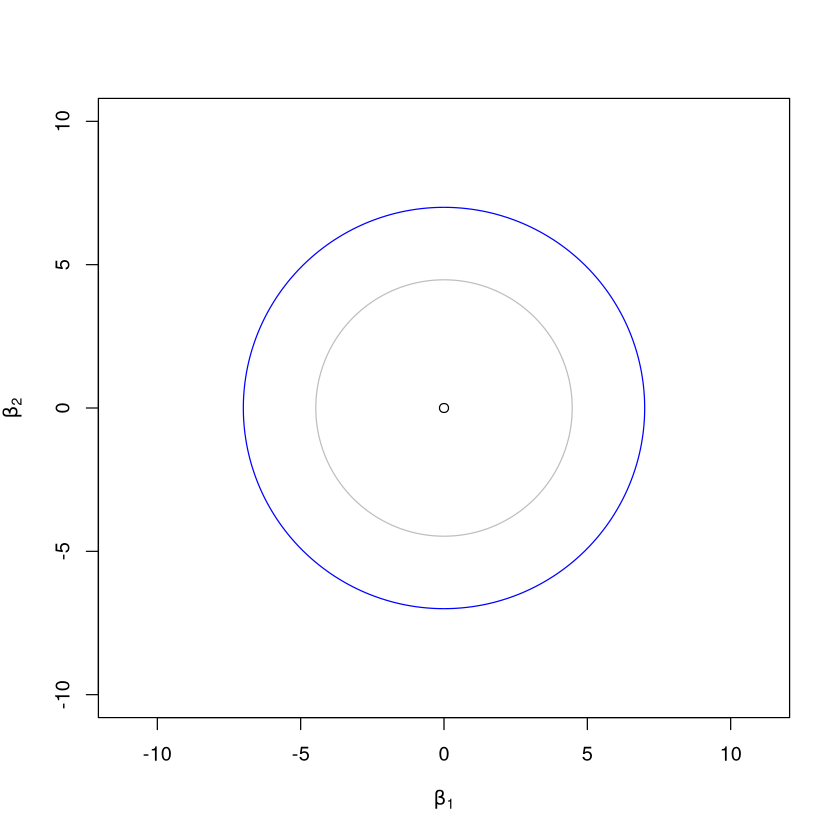

In [14]:
plot(0, type = "n", xlab = expression(beta[1]), ylab = expression(beta[2]),
     xlim=c(-10, 10), ylim = c(-10, 10), asp = 1)             #Create an empty plot with aspect ratio 1.
points(0, 0)                                  #Plot the centre (marking)
circle(0, 0, sqrt(20), col="grey")
circle(0, 0, 7, col="blue")

## Ellipse Correlation Plot


Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs




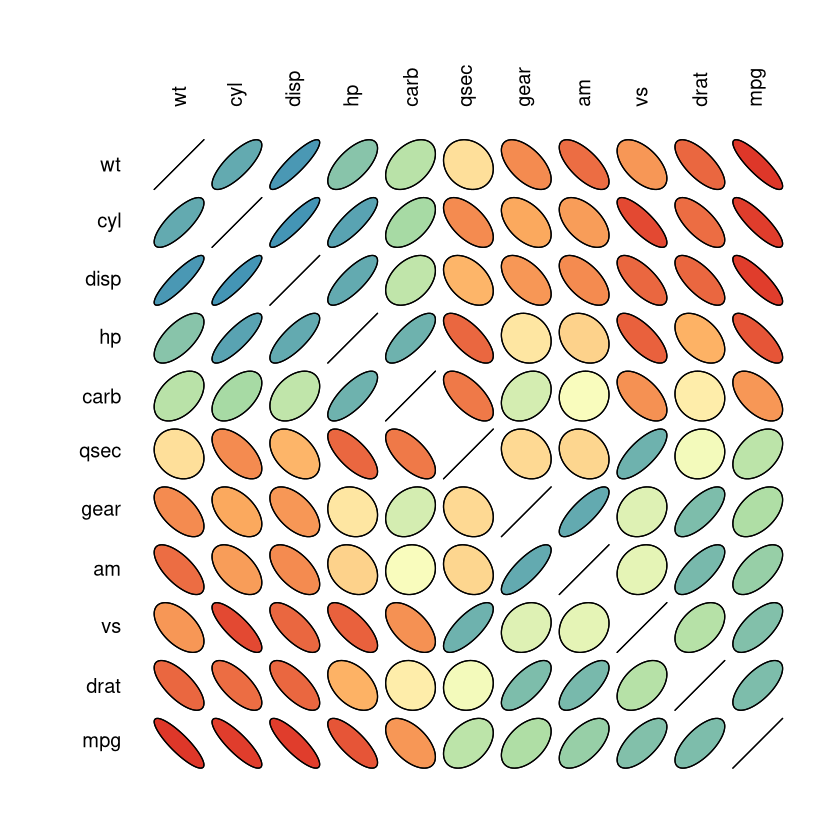

In [15]:
library(ellipse)
library(RColorBrewer)

# Use of the mtcars data proposed by R
data=cor(mtcars)

# Build a Pannel of 100 colors with Rcolor Brewer
my_colors <- brewer.pal(5, "Spectral")
my_colors=colorRampPalette(my_colors)(100)

# Order the correlation matrix
ord <- order(data[1, ])
data_ord = data[ord, ord]
plotcorr(data_ord , col=my_colors[data_ord*50+50] , mar=c(1,1,1,1))

## Box Plot over Histogram

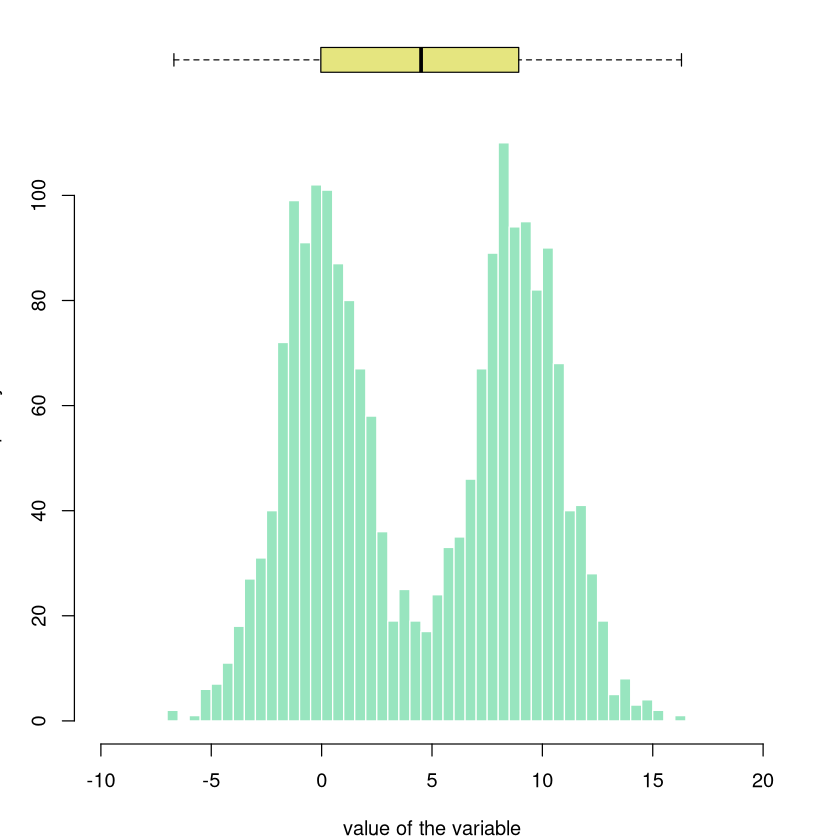

In [16]:
# Creating data 
my_variable <- c(rnorm(1000, 0, 2) , rnorm(1000, 9, 2))

# Layout to split the screen
layout(mat = matrix(c(1, 2), 2, 1, byrow = TRUE), height = c(1, 8))

# Draw the boxplot and the histogram 
par(mar=c(0, 3.1, 1.1, 2.1))
boxplot(my_variable, horizontal = TRUE , ylim = c(-10, 20), xaxt = "n" , 
        col = rgb(0.8, 0.8, 0, 0.5), frame = F)
par(mar = c(4, 3.1, 1.1, 2.1))
hist(my_variable , breaks=40, col = rgb(0.2, 0.8, 0.5, 0.5) , border = F , main="" , 
     xlab = "value of the variable", xlim = c(-10, 20))

## Radarchart

Registered S3 methods overwritten by 'fmsb':
  method    from
  print.roc pROC
  plot.roc  pROC



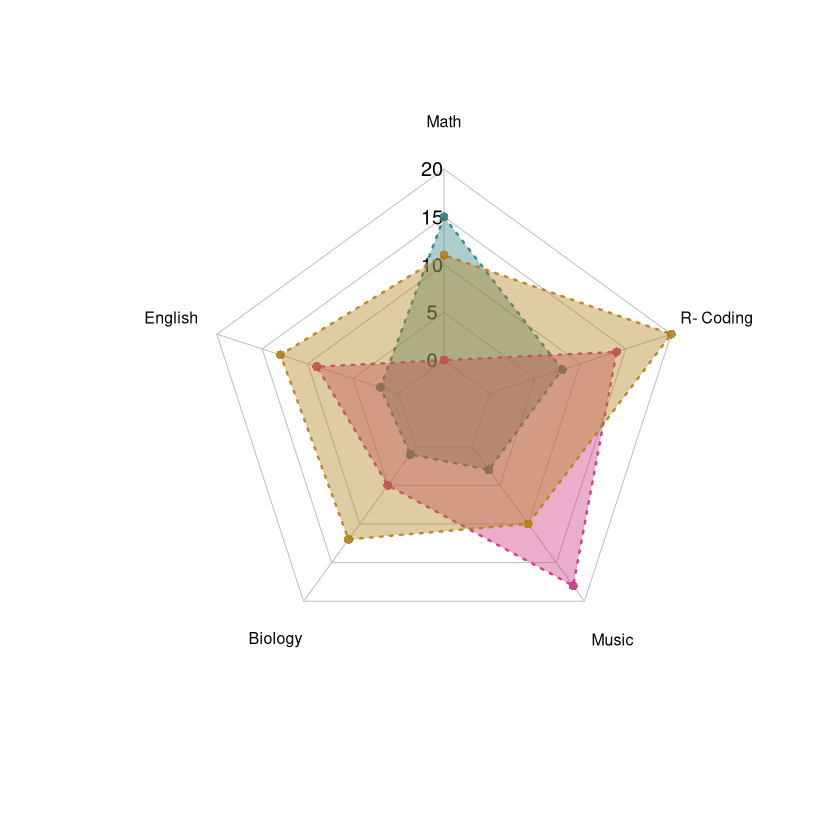

In [17]:
library(fmsb)
 
# Create data: note in High school for several students
set.seed(99)
data <- as.data.frame(matrix(sample(0:20, 15 ,replace = F) , ncol = 5))
colnames(data)<- c("Math", "English", "Biology", "Music", "R- Coding")
rownames(data)<- paste("Mr" , LETTERS[1:3] , sep=".")
 
# To use the fmsb package, I have to add 2 lines to the dataframe: the max and min of each topic to show on the plot!
data<- rbind(rep(20, 5), rep(0,5), data)

colors_border<- c(rgb(0.2, 0.5, 0.5, 0.9), rgb(0.8, 0.2, 0.5, 0.9), rgb(0.7, 0.5, 0.1, 0.9))
colors_in<- c(rgb(0.2, 0.5, 0.5, 0.4), rgb(0.8, 0.2, 0.5, 0.4), rgb(0.7, 0.5, 0.1, 0.4))
radarchart(data, axistype = 1, 
    #custom polygon
    pcol = colors_border, pfcol = colors_in , plwd = 2, plty = 3,
    #custom the grid
    cglcol = "grey", cglty = 1, axislabcol = "black", caxislabels = seq(0, 20, 5), cglwd = 0.8,
    #custom labels
    vlcex=0.8 
    )
legend(x = 1.7, y = 1, legend = rownames(data[-c(1,2),]), bty = "n", pch = 20 , 
       col = colors_in , text.col = "black", cex = 1, pt.cex = 2)

## Marginal Plots

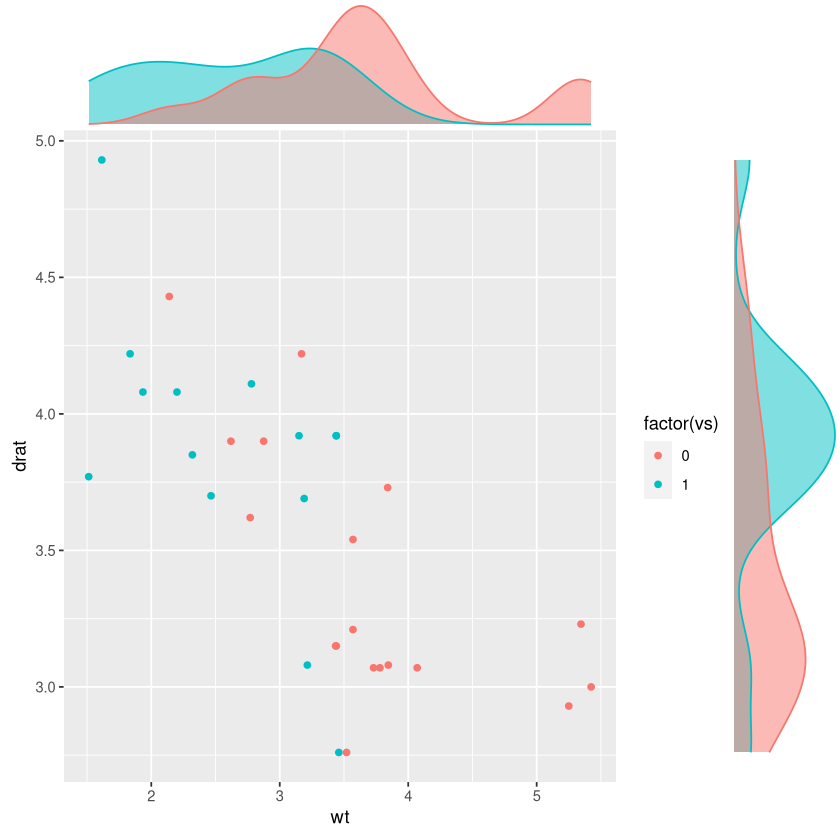

In [18]:
library(ggplot2)
library(ggExtra)

# classic plot :
p <- ggplot(mtcars, aes(x = wt, y = drat, colour = factor(vs))) +
     geom_point()
ggMarginal(p, groupColour = TRUE, groupFill = TRUE, type = "density")